In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
#load the dataset
df=pd.read_csv("Placement_Data_Full_Class.csv")
#see the 5 first data
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
#set the sl_no as a row no
df.set_index('sl_no',inplace=True)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
#check datatype or null 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


In [5]:
#see some statics data
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [6]:
#check number of rows and columns
print(df.shape[0]) #no of rows
print(df.shape[1]) #no of columns

215
14


In [7]:
# check null values in df
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [8]:
#fill salary null value with mode 
df["salary"]=df["salary"].fillna(df["salary"].mean())

In [9]:
#check datatypes
df.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [10]:
# we convert object type data into numerical datatype
df['gender']=df['gender'].astype('category')
df['status']=df['status'].astype('category')
df['workex']=df['workex'].astype('category')
df['hsc_b']=df['hsc_b'].astype('category')
df['ssc_b']=df['ssc_b'].astype('category')

In [11]:
#check how many unique data in these dataframe

print(df['gender'].unique())
print(df['status'].unique())
print(df['workex'].unique())
print(df['hsc_b'].unique())
print(df['ssc_b'].unique())

['M', 'F']
Categories (2, object): ['F', 'M']
['Placed', 'Not Placed']
Categories (2, object): ['Not Placed', 'Placed']
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
['Others', 'Central']
Categories (2, object): ['Central', 'Others']
['Others', 'Central']
Categories (2, object): ['Central', 'Others']


In [12]:
# Replace the value in 0,1 or quantitative parameters
df["gender"].replace(["F","M"],[0,1],inplace=True)
df["status"].replace(['Placed',"Not Placed"],[1,0],inplace=True)

df['workex'].replace(to_replace ="Yes", value =1,inplace=True) 
df['workex'].replace(to_replace ="No", value =0,inplace=True)

In [13]:
df["gender"].dtype

dtype('int64')

In [14]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.000000
2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.000000
3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.000000
4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,288655.405405
5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.000000


In [15]:
#create a new dataframe of only numerical values
numerical_df=df.select_dtypes(["float64","int64"])

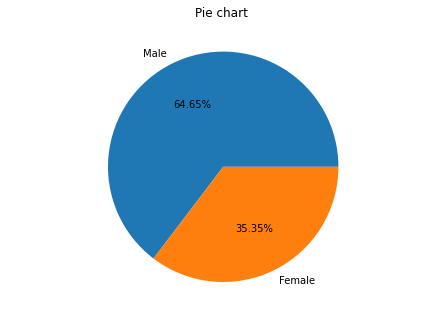

In [16]:
# show the percentage of male or female
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Male','Female']
students = [139,76]
ax.pie(students, labels = langs,autopct='%1.2f%%',colors = ["#1f77b4", "#ff7f0e"])
plt.title('Pie chart ')
plt.show()

Number of not placed Student 67
Number of placed Student 0


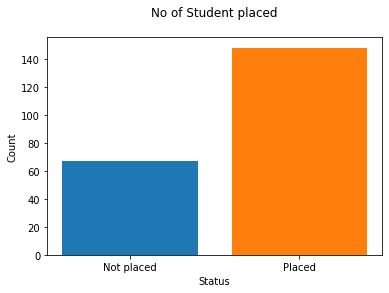

In [17]:
#show the no. of student how placed or not placed.

print("Number of not placed Student "+ str(len(df[df["status"]==0])))
print("Number of placed Student "+ str(len(df[df["status"]=="Placed"])))

plt.bar([0],height=len(df[df["status"]==0]))
plt.bar([1],height=len(df[df["status"]==1]))

plt.xlabel("Status")
plt.ylabel("Count")

plt.xticks(np.arange(2), ('Not placed', 'Placed'))
plt.title("No of Student placed\n")
plt.show()

scc_p mean = 67.30339534883721
hsc_p mean = 66.33316279069768
mba_p mean = 62.278186046511635
degree_p mean = 66.37018604651163


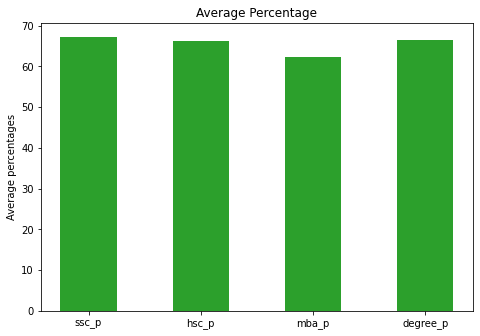

In [18]:
#average percentage of all education qualification
values = [(numerical_df['ssc_p'].mean()),(numerical_df['hsc_p'].mean()),(numerical_df['mba_p'].mean()),(numerical_df['degree_p'].mean())]
print('scc_p mean = ' +str(numerical_df['ssc_p'].mean()))
print('hsc_p mean = ' +str(numerical_df['hsc_p'].mean()))
print('mba_p mean = ' +str(numerical_df['mba_p'].mean()))
print('degree_p mean = ' +str(numerical_df['degree_p'].mean()))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['ssc_p','hsc_p','mba_p','degree_p']
ax.set_ylabel('Average percentages')
ax.set_title('Average Percentage')
ax.bar(names,values,width = 0.5,color=["#2ca02c"])
plt.show()

In [19]:
#show the relation between diffrent qualification placement status usinng correlation.

print('ssc_p to placement ', round(numerical_df['status'].corr(numerical_df['ssc_p'])*100,1),'%')
print('hsc_p to placement ', round(numerical_df['status'].corr(numerical_df['hsc_p'])*100,1),'%')
print('mba_p to placement ', round(numerical_df['status'].corr(numerical_df['mba_p'])*100,1),'%')
print('degree_p to placement ', round(numerical_df['status'].corr(numerical_df['degree_p'])*100,1),'%')
print('etest_p to placement ', round(numerical_df['status'].corr(numerical_df['etest_p'])*100,1),'%')

ssc_p to placement  60.8 %
hsc_p to placement  49.1 %
mba_p to placement  7.7 %
degree_p to placement  48.0 %
etest_p to placement  12.8 %


In [20]:
df_grade = df.groupby(['status']).mean()[['hsc_p', 'degree_p', 'mba_p']].reset_index()

In [21]:
#Student Grades and Campus Placement

import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
plotly.offline.init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
%matplotlib inline

trace1 = go.Bar(
    x = ['High School', 'Bachelor', 'MBA'],
    y = df_grade[df_grade['status']==0].drop('status', axis=1).values[0],
    name = 'Not Placed'
)

trace2 = go.Bar(
    x = ['High School', 'Bachelor', 'MBA'],
    y = df_grade[df_grade['status']==1].drop('status', axis=1).values[0],
    name = 'Placed'
)

data = [trace1, trace2]

layout = go.Layout(
    yaxis = dict(title = 'Grade'),
    xaxis = dict(title = 'Stage'),
    title = 'Student Grades and Campus Placement')

fig = go.Figure(data=data, layout=layout)
fig.show()


specialisation in Mkt&Fin 120
specialisation in Mkt&HR 95


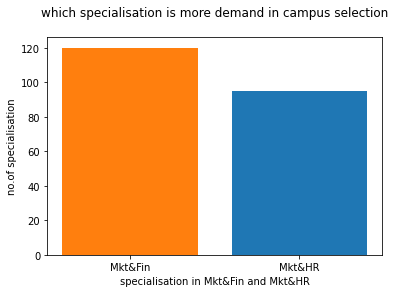

In [22]:
# which specialisation is more demand in campus selection

plt.bar([1],height=len(df[df["specialisation"]=="Mkt&HR"]))
plt.bar([0],height=len(df[df["specialisation"]=="Mkt&Fin"]))
plt.xlabel("specialisation in Mkt&Fin and Mkt&HR")
plt.ylabel("no.of specialisation")

print("specialisation in Mkt&Fin "+ str(len(df[df["specialisation"]=="Mkt&Fin"])))
print("specialisation in Mkt&HR "+ str(len(df[df["specialisation"]=="Mkt&HR"])))
plt.xticks(np.arange(2), ('Mkt&Fin', 'Mkt&HR'))
plt.title("which specialisation is more demand in campus selection\n")
plt.show()

In [23]:
len(df[['ssc_p','hsc_p','degree_p','workex','etest_p','mba_p']])

215

In [24]:
x_train , x_test , y_train , y_test = train_test_split(
    df[['ssc_p','hsc_p','degree_p','workex','etest_p','mba_p']],
    df.status,
    test_size=0.2)

In [25]:
x_train.head()

,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p
sl_no,,,,,,
194,60.0,63.0,56.0,1,80.00,56.63
119,76.0,80.0,78.0,1,97.00,70.48
98,70.5,62.5,61.0,0,93.91,69.03
76,59.0,62.0,77.5,0,74.00,67.00
9,73.0,79.0,72.0,0,91.34,61.29


In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [27]:
# create a logistic regresssion model and fit it.
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [28]:
prediction=model.predict(x_test)

In [29]:
accuracy_score(y_test,prediction)

0.813953488372093

In [30]:
# Fitting Random Forest Regressoin to the Training set
# Instantiate model with 105 decision trees

rf = RandomForestRegressor(n_estimators = 105, random_state = 41)

rf.fit(x_test, y_test);

In [31]:
# Predicting the Test set results
y_pred = rf.predict(x_test)

In [32]:
rf.score(x_test,y_pred)

1.0

In [33]:
y_pred

array([0.32380952, 1.        , 0.05714286, 0.99047619, 0.72380952,
       0.91428571, 0.88571429, 0.3047619 , 0.97142857, 1.        ,
       0.85714286, 0.95238095, 0.07619048, 0.74285714, 1.        ,
       0.96190476, 0.07619048, 0.22857143, 0.14285714, 0.32380952,
       0.7047619 , 0.87619048, 0.97142857, 1.        , 0.02857143,
       0.00952381, 0.25714286, 0.18095238, 1.        , 0.99047619,
       1.        , 0.07619048, 1.        , 1.        , 0.94285714,
       1.        , 0.97142857, 0.78095238, 0.8952381 , 0.8952381 ,
       0.01904762, 1.        , 1.        ])

In [34]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [35]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
      dtype=int64)

In [36]:
accuracy_score(y_test,y_pred)

0.8372093023255814

In [37]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  4],
       [ 3, 26]], dtype=int64)